# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = os.path.join ("Resources/city_data.csv")
ride_data_to_load = os.path.join ("Resources/ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city 
ride_by_city = pyber_data_df.groupby ('type'). count().ride_id
ride_by_city
# Create the Suburban and Rural city DataFrames.
#suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
#rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# Get the number of rides for urban cities.
#urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#urban_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
drivers_by_city_type = city_data_df.groupby('type').sum().driver_count
drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
fares_by_city_type = pyber_data_df.groupby('type').sum().fare
fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_city_type = pyber_data_df.groupby('type').mean().fare
avg_fare_by_city_type


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare_by_city_type = pyber_data_df.groupby('type').sum().fare / drivers_by_city_type
avg_driver_fare_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame(
    { "Total Rides": ride_by_city,
      "Total Drivers": drivers_by_city_type,
      "Total Fares": fares_by_city_type,
      "Average Fare per Ride": avg_fare_by_city_type,
      "Average Fare per Driver": avg_driver_fare_by_city_type})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [12]:
pyber_data_df['date']=pd.to_datetime(pyber_data_df['date'])

In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_city_df  = pyber_data_df.groupby(['type','date']).sum()['fare']
fare_by_city_df

type   date               
Rural  2019-01-01 09:45:00    43.69
       2019-01-02 11:18:00    52.12
       2019-01-03 19:51:00    19.90
       2019-01-04 03:31:00    24.88
       2019-01-06 07:38:00    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:00    18.45
       2019-05-08 07:29:00    18.55
       2019-05-08 11:38:00    19.77
       2019-05-08 13:10:00    18.04
Name: fare, Length: 2364, dtype: float64

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_by_city_df = fare_by_city_df.reset_index()
fare_by_city_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_by_city_date_pivot = pd.pivot_table(fare_by_city_df, index='date',columns='type', values='fare')
fare_by_city_date_pivot



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
loc_fare_date_df = fare_by_city_date_pivot.loc['2019-01-01':'2019-04-28',:]
loc_fare_date_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
#type(fare_dates_df.index)

loc_fare_date_df.index = pd.to_datetime(loc_fare_date_df.index)
loc_fare_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
loc_fare_date_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_weekly_df =loc_fare_date_df.resample('W').sum()
fare_weekly_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


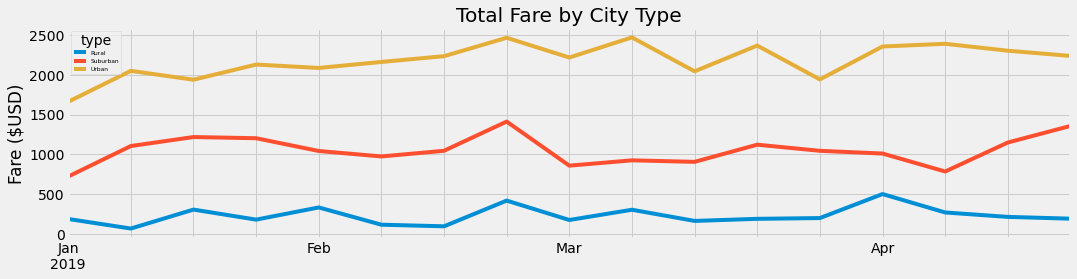

In [53]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

import numpy as np
ax = fare_weekly_df.plot(xticks=fare_weekly_df.index, figsize=(16,4))
plt.gcf().subplots_adjust(bottom=0.15)

# Set the x and y label
ylab = ax.set_ylabel('Fare ($USD)')
ax.set_xlabel(None)
# Create a title. 
ax.set_title("Total Fare by City Type")
plt.legend(loc= 'upper left', title='type',fontsize="6")

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")


plt.show()